# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [1]:
import pandas as pd

vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
promocoes_df = pd.read_csv(r'Contoso - Promocoes.csv', sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')

display(vendas_df.head())
display(produtos_df.head())
display(lojas_df.head())
display(promocoes_df.head())
display(clientes_df.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1


,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


,ï¿½ID Loja,Nome da Loja,Quantidade Colaboradores,Pais
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos


,ÿID Promocao,Nome Promocao,Percentual Desconto,Data Inicio,Data Termino,Unnamed: 5,Unnamed: 6
0,1,Sem desconto,0,01/01/2017,31/12/2020,NaN,NaN
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017,NaN,NaN
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017,NaN,NaN
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017,NaN,NaN
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018,NaN,NaN


,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN


## Renomendo os DataFrames

In [2]:
vendas_df = vendas_df.rename(columns={'Numero da Venda':'num_venda',
                                      'Data da Venda':'dt_venda',
                                      'Data do Envio':'dt_envio',
                                      'ID Canal	':'id_canal',
                                      'ID Loja':'id_loja',
                                      'ID Produto':'id_produto',
                                      'ID Promocao':'id_promocao',
                                      'ID Cliente':'id_cliente',
                                      'Quantidade Vendida':'qtd_vendida',
                                      'Quantidade Devolvida':'qtd_devolvida'})

produtos_df = produtos_df.rename(columns={'ÿNome do Produto':'nm_produto',
                                          'Descricao do Produto':'produto_desc',
                                          'Fabricante':'fabricante',
                                          'Nome da Marca':'nm_marca',
                                          'Tipo':'tipo',
                                          'Custo Unitario':'custo_unitario',
                                          'Preco Unitario':'preco_unitario',
                                          'ID Produto':'id_produto',
                                          'ID Subcategoria':'id_subcategoria'})

lojas_df = lojas_df.rename(columns={'ï¿½ID Loja':'id_loja',
                                    'Nome da Loja':'nm_loja',
                                    'Quantidade Colaboradores':'qtd_colaboradores',
                                    'Pais':'pais'})

promocoes_df = promocoes_df.rename(columns={'ÿID Promocao':'id_promocao',
                                            'Nome Promocao':'nm_promocao',
                                            'Percentual Desconto':'percentual_desconto',
                                            'Data Inicio':'dt_inicio',
                                            'Data Termino':'dt_termino'})


clientes_df = clientes_df.rename(columns={'ÿID Cliente':'id_cliente',
                                          'Primeiro Nome':'primeiro_nome',
                                          'Sobrenome':'sobrenome',
                                          'E-mail':'email_cliente',
                                          'Genero':'sexo',
                                          'Numero de Filhos':'num_filhos',
                                          'Data de Nascimento':'dt_nascimento'})

display(vendas_df.head())
display(produtos_df.head())
display(lojas_df.head())
display(promocoes_df.head())
display(clientes_df.head())

,num_venda,dt_venda,dt_envio,ID Canal,id_loja,id_produto,id_promocao,id_cliente,qtd_vendida,qtd_devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1


,nm_produto,produto_desc,fabricante,nm_marca,tipo,custo_unitario,preco_unitario,id_produto,id_subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


,id_loja,nm_loja,qtd_colaboradores,pais
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos


,id_promocao,nm_promocao,percentual_desconto,dt_inicio,dt_termino,Unnamed: 5,Unnamed: 6
0,1,Sem desconto,0,01/01/2017,31/12/2020,NaN,NaN
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017,NaN,NaN
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017,NaN,NaN
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017,NaN,NaN
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018,NaN,NaN


,id_cliente,primeiro_nome,sobrenome,email_cliente,sexo,num_filhos,dt_nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [3]:
promocoes_df = promocoes_df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)
clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
display(promocoes_df.head())
display(clientes_df.head())

,id_promocao,nm_promocao,percentual_desconto,dt_inicio,dt_termino
0,1,Sem desconto,0,01/01/2017,31/12/2020
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018


,id_cliente,primeiro_nome,sobrenome,email_cliente,sexo,num_filhos,dt_nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975


## Removendo colunas

In [4]:
clientes_df = clientes_df[['id_cliente', 'email_cliente']]
produtos_df = produtos_df [['id_produto', 'nm_produto']]
lojas_df = lojas_df[['id_loja', 'nm_loja']]

display(clientes_df.head())
display(produtos_df.head())
display(lojas_df.head())

,id_cliente,email_cliente
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com


,id_produto,nm_produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver


,id_loja,nm_loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [5]:
#juntando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='id_produto')
vendas_df = vendas_df.merge(lojas_df, on='id_loja')
vendas_df = vendas_df.merge(clientes_df, on='id_cliente')
display(vendas_df.head())

#exibindo o dataframe final


,num_venda,dt_venda,dt_envio,ID Canal,id_loja,id_produto,id_promocao,id_cliente,qtd_vendida,qtd_devolvida,nm_produto,nm_loja,email_cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp


In [6]:
#vamos renomear o e-mail para ficar claro que é do cliente


### Agora podemos começar as análises

## Qual cliente que comprou mais vezes

email_cliente
karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: count, Length: 38907, dtype: int64

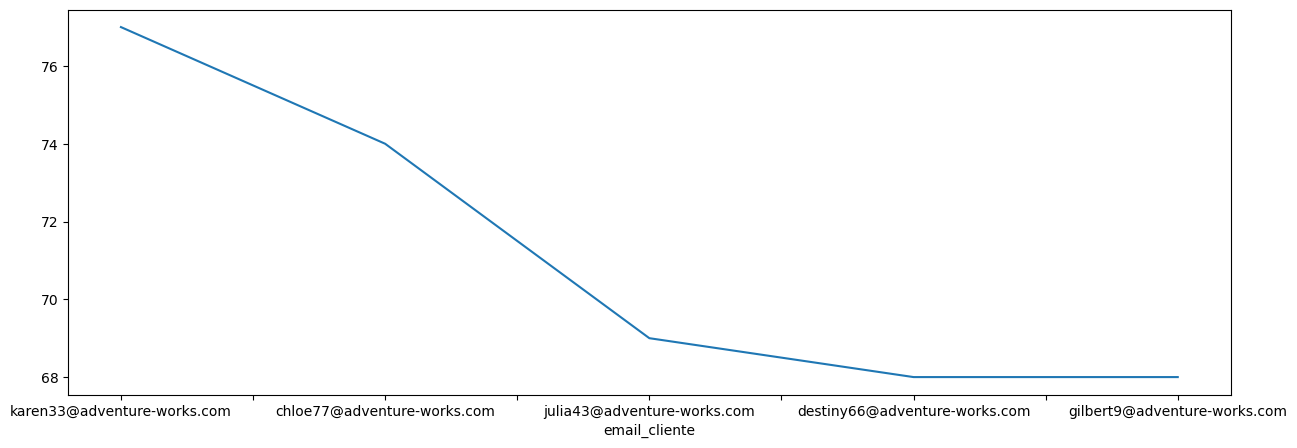

In [7]:
mais_compraram = vendas_df['email_cliente'].value_counts()
display(mais_compraram)
mais_compraram[:5].plot(figsize=(15, 5));

In [8]:
vendas_lojas = vendas_df.groupby('nm_loja').sum()
vendas_lojas = vendas_lojas[['qtd_vendida', ]]